In [1]:
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
import numpy
import pandas as pd

In [2]:
data=pd.read_csv('C:/Users/ADITYA/Downloads/gas_turbines.csv')

In [3]:
data

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,111.61,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,111.78,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,110.19,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,110.74,10.533,6.2494,93.227


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   AFDP    15039 non-null  float64
 4   GTEP    15039 non-null  float64
 5   TIT     15039 non-null  float64
 6   TAT     15039 non-null  float64
 7   TEY     15039 non-null  float64
 8   CDP     15039 non-null  float64
 9   CO      15039 non-null  float64
 10  NOX     15039 non-null  float64
dtypes: float64(11)
memory usage: 1.3 MB


In [5]:
data.isnull().sum()

AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
TEY     0
CDP     0
CO      0
NOX     0
dtype: int64

In [6]:
data.describe()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
count,15039.000000,15039.00000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000
mean,17.764381,1013.19924,79.124174,4.200294,25.419061,1083.798770,545.396183,134.188464,12.102353,1.972499,68.190934
std,7.574323,6.41076,13.793439,0.760197,4.173916,16.527806,7.866803,15.829717,1.103196,2.222206,10.470586
min,0.522300,985.85000,30.344000,2.087400,17.878000,1000.800000,512.450000,100.170000,9.904400,0.000388,27.765000
25%,11.408000,1008.90000,69.750000,3.723900,23.294000,1079.600000,542.170000,127.985000,11.622000,0.858055,61.303500
50%,18.186000,1012.80000,82.266000,4.186200,25.082000,1088.700000,549.890000,133.780000,12.025000,1.390200,66.601000
75%,23.862500,1016.90000,90.043500,4.550900,27.184000,1096.000000,550.060000,140.895000,12.578000,2.160400,73.935500
max,34.929000,1034.20000,100.200000,7.610600,37.402000,1100.800000,550.610000,174.610000,15.081000,44.103000,119.890000


In [7]:
data.shape

(15039, 11)

<AxesSubplot:>

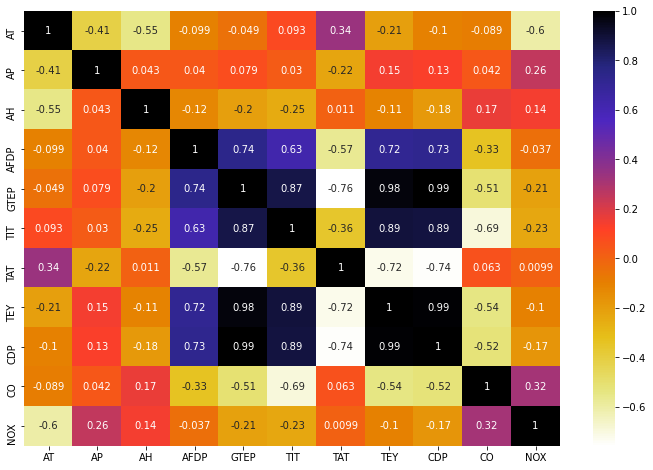

In [8]:
#correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
cor = data.corr()
sns.heatmap(cor, annot=True, cmap= plt.cm.CMRmap_r)


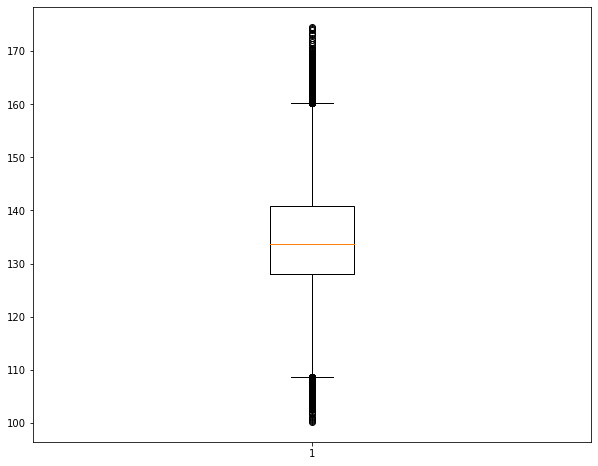

In [9]:
#visualization
plt.figure(figsize=(10,8))
plt.boxplot(data.TEY)
plt.show()

<AxesSubplot:>

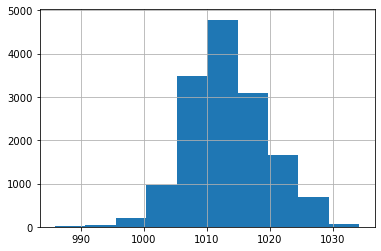

In [10]:
data.AP.hist()

<AxesSubplot:>

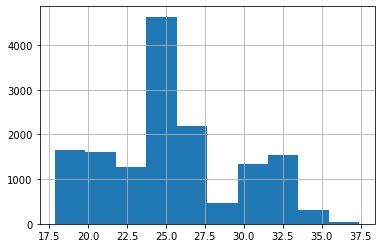

In [11]:
data.GTEP.hist()

<AxesSubplot:>

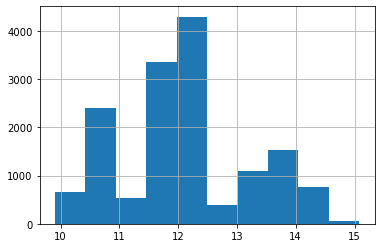

In [12]:
data.CDP.hist()

<AxesSubplot:xlabel='TEY', ylabel='AP'>

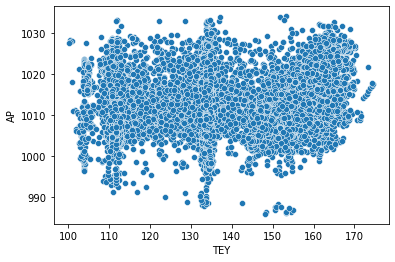

In [13]:
sns.scatterplot(x='TEY', y='AP',data=data)

In [14]:
X = data.drop('TEY', axis=1)
Y = data.TEY

In [15]:
X

,AT,AP,AH,AFDP,GTEP,TIT,TAT,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,10.533,6.2494,93.227


# standardize data

In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data1 = scaler.fit_transform(X)
data1

array([[-1.4397781 , -0.82664395,  1.28143632, ..., -1.35733078,
         0.53201195,  1.3878449 ],
       [-1.44960109, -0.74864748,  1.30456402, ..., -1.36367619,
         0.56873344,  1.39300237],
       [-1.43472138, -0.68625031,  1.21908576, ..., -1.36095673,
         0.5529378 ,  1.36358566],
       ...,
       [-1.38626659, -1.07623263,  1.47697056, ..., -1.46792219,
         2.69592467,  2.17006209],
       [-1.42042259, -0.99823616,  1.44159024, ..., -1.42259784,
         1.9246834 ,  2.391165  ],
       [-1.43073409, -0.93583899,  1.33465179, ..., -1.37727349,
         1.35415028,  2.32153907]])

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.3, random_state = 0)

# model build

In [18]:
model = Sequential()
model.add(Dense(12, input_dim=10, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='linear'))

In [19]:
# Compile model
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [20]:
# Fit the model #30% of test data
history=model.fit(np.array(X_train),np.array(y_train),validation_split=0.3, epochs=100, batch_size=12)

Epoch 1/100
614/614 [==============================] - 4s 4ms/step - loss: 2070.0723 - accuracy: 0.0000e+00 - val_loss: 2074.7581 - val_accuracy: 0.0000e+00
Epoch 2/100
614/614 [==============================] - 2s 3ms/step - loss: 2070.0745 - accuracy: 0.0000e+00 - val_loss: 2074.7581 - val_accuracy: 0.0000e+00
Epoch 3/100
614/614 [==============================] - 2s 3ms/step - loss: 2070.0732 - accuracy: 0.0000e+00 - val_loss: 2074.7581 - val_accuracy: 0.0000e+00
Epoch 4/100
614/614 [==============================] - 2s 3ms/step - loss: 2070.0732 - accuracy: 0.0000e+00 - val_loss: 2074.7581 - val_accuracy: 0.0000e+00
Epoch 5/100
614/614 [==============================] - 2s 3ms/step - loss: 2070.0730 - accuracy: 0.0000e+00 - val_loss: 2074.7581 - val_accuracy: 0.0000e+00
Epoch 6/100
614/614 [==============================] - 2s 3ms/step - loss: 2070.0730 - accuracy: 0.0000e+00 - val_loss: 2074.7581 - val_accuracy: 0.0000e+00
Epoch 7/100
614/614 [==============================] - 2s 

In [21]:
# evaluate the model
scores = model.evaluate(X_test, y_test)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

141/141 [==============================] - 1s 4ms/step - loss: 2066.0496 - accuracy: 0.0000e+00
accuracy: 0.00%


In [22]:
#As we get 0.0% accuracy which is too less
#we will build a new model using different loss function and different optimizer.

# another model build

In [23]:
model1 = Sequential()
model1.add(Dense(16, input_dim=10, activation='relu'))
model1.add(Dense(12, activation='relu'))
model1.add(Dense(1, activation='linear'))

In [24]:
# Compile model
model1.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse'])

In [25]:
# Fit the model #30% of test data
history2=model1.fit(np.array(X_train),np.array(y_train),validation_split=0.3, epochs=100, batch_size=12)

Epoch 1/100
614/614 [==============================] - 3s 4ms/step - loss: 218.6852 - mse: 218.6852 - val_loss: 171.2396 - val_mse: 171.2396
Epoch 2/100
614/614 [==============================] - 2s 4ms/step - loss: 128.9525 - mse: 128.9525 - val_loss: 77.2892 - val_mse: 77.2892
Epoch 3/100
614/614 [==============================] - 2s 4ms/step - loss: 53.9190 - mse: 53.9190 - val_loss: 27.1681 - val_mse: 27.1681
Epoch 4/100
614/614 [==============================] - 2s 3ms/step - loss: 22.4121 - mse: 22.4121 - val_loss: 13.4900 - val_mse: 13.4900
Epoch 5/100
614/614 [==============================] - 2s 3ms/step - loss: 15.0287 - mse: 15.0287 - val_loss: 9.7388 - val_mse: 9.7388
Epoch 6/100
614/614 [==============================] - 2s 3ms/step - loss: 10.7398 - mse: 10.7398 - val_loss: 8.0324 - val_mse: 8.0324
Epoch 7/100
614/614 [==============================] - 2s 3ms/step - loss: 9.4635 - mse: 9.4635 - val_loss: 6.5726 - val_mse: 6.5726
Epoch 8/100
614/614 [======================

In [26]:
# evaluate the model
scores = model1.evaluate(X_test, y_test)
print("%s: %.2f%%" % (model1.metrics_names[1], scores[1]*100))

141/141 [==============================] - 1s 4ms/step - loss: 0.9949 - mse: 0.9949
mse: 99.49%


In [27]:
history2.history.keys()

dict_keys(['loss', 'mse', 'val_loss', 'val_mse'])

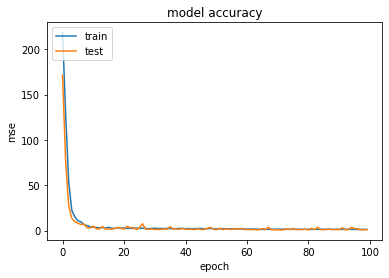

In [28]:
# summarize history for accuracy
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(history2.history['mse'])
plt.plot(history2.history['val_mse'])
plt.title('model accuracy')
plt.ylabel('mse')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()